# Business Insights & Executive Report  
## Brazilian E-Commerce Dataset Analysis  

### Project Objective
This project performs a full end-to-end analysis of a Brazilian E-commerce dataset.  
The goal is to generate actionable business insights that can help decision-makers improve revenue, customer satisfaction, and operational efficiency.

### Key Focus Areas:
- Revenue Analysis
- Regional Sales Performance
- Top Products & Categories
- Customer Behavior
- Payment Patterns
- Review & Satisfaction Analysis

This analysis follows a structured analytics workflow:
Data Cleaning → EDA → Visualization → Business Insights → Executive Summary

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

## 1. Data Loading & Preprocessing

We first load multiple relational datasets and merge them into a master dataset.
The data is cleaned to remove null values, duplicates, and incorrect data types

In this step, we load all required datasets from the Olist E-commerce dataset.
These datasets are relational and will later be merged using common keys.

In [4]:
# Load datasets

orders = pd.read_csv("olist_orders_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
customers = pd.read_csv("olist_customers_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")

# Display sample data
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


## 2. Data Understanding
Before cleaning data and datasets, we need to explore :
- Dataset shapes
- Missing values
- Duplicate values
- Data types

check the basic infos


In [5]:
# Check dataset shapes
print("Orders shape:", orders.shape)
print("Order Items shape:", order_items.shape)
print("Products shape:", products.shape)
print("Customers shape:", customers.shape)
print("Payments shape:", payments.shape)
print("Reviews shape:", reviews.shape)

Orders shape: (99441, 8)
Order Items shape: (112650, 7)
Products shape: (32951, 9)
Customers shape: (99441, 5)
Payments shape: (103886, 5)
Reviews shape: (99224, 7)


In [7]:
# check for missing values
print("Missing values in Orders:\n", orders.isnull().sum())
print("Missing values in Order Items:\n", order_items.isnull().sum())
print("Missing values in Products:\n", products.isnull().sum())
print("Missing values in Customers:\n", customers.isnull().sum())
print("Missing values in Payments:\n", payments.isnull().sum())
print("Missing values in Reviews:\n", reviews.isnull().sum())


Missing values in Orders:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
Missing values in Order Items:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Missing values in Products:
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
Missing values in Customers:
 customer_id                 0
customer_unique_id          

## 3. Data Cleaning
- Handling missing values
- Removing duplicates
- Converting data columns into datetime formate
- Standardizing column names

1.Remove Duplicates

In [8]:
orders.drop_duplicates(inplace=True)
order_items.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
customers.drop_duplicates(inplace=True)
payments.drop_duplicates(inplace=True)
reviews.drop_duplicates(inplace=True)


2.Handling missing values

In [9]:
#Filling missing values in reviews
reviews['review_comment_message'].fillna('No comment', inplace=True)

#Drop rows with missing values in products dataset
products.dropna(subset=['product_category_name'], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_15076\655942022.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reviews['review_comment_message'].fillna('No comment', inplace=True)


3.Convert date columns

In [10]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

4.Creating delivery time feature

In [11]:
orders['delivery_time_days'] = (
    orders['order_delivered_customer_date'] - 
    orders['order_purchase_timestamp']
).dt.days

## 4 Data Merging

Since the dataset is relational , we merge tables using column keys as :
- Order_id
- Customer_id
- Product_id


In [12]:
# Merge orders with customers
merged_df = pd.merge(orders, customers, on='customer_id', how='left')

# Merge order items
merged_df = pd.merge(merged_df, order_items, on='order_id', how='left')

# Merge products
merged_df = pd.merge(merged_df, products, on='product_id', how='left')

# Merge payments
merged_df = pd.merge(merged_df, payments, on='order_id', how='left')

# Merge reviews
merged_df = pd.merge(merged_df, reviews, on='order_id', how='left')

merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,13.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,No comment,2018-08-18 00:00:00,2018-08-22 19:07:58


In [13]:
print("Final merged dataset shape:", merged_df.shape)
merged_df.info()


Final merged dataset shape: (119143, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              118966 non-null  object        
 5   order_delivered_carrier_date   117057 non-null  object        
 6   order_delivered_customer_date  115722 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  object        
 8   delivery_time_days             115722 non-null  float64       
 9   customer_unique_id             119143 non-null  object        
 10  customer_zip_code_prefix   

Now , the data is merged

## 5 Final Data Preparation
Before analysis:
- Remove rows with missing price values
- Ensure numeric columns are properly formatted
- Create additional time-based features

In [14]:
# Remove rows where price is missing
merged_df = merged_df.dropna(subset=['price'])

# Convert price to numeric (safety check)
merged_df['price'] = pd.to_numeric(merged_df['price'])

# Extract Month and Year
merged_df['year'] = merged_df['order_purchase_timestamp'].dt.year
merged_df['month'] = merged_df['order_purchase_timestamp'].dt.month

## 6 Data visualization 
Now we're styling and make efforts on visualization with insights of:
- Total revenue
- Sales by region
- Top product categories
- Monthly revenue trends
- Payment type distributions

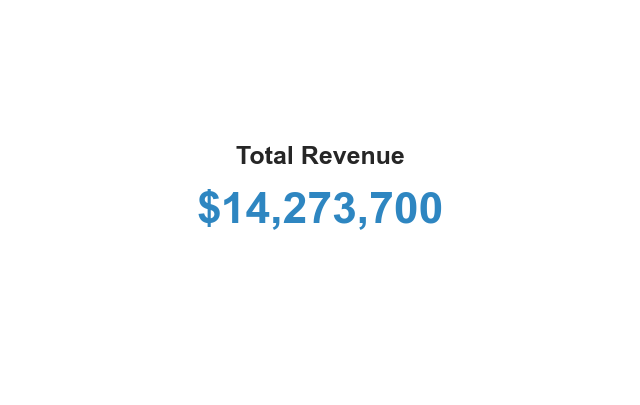

In [16]:
#Total revenue calculation

total_revenue = merged_df['price'].sum()

plt.figure(figsize=(8,5))
plt.text(0.5, 0.6, "Total Revenue", fontsize=18, ha='center', weight='bold')
plt.text(0.5, 0.45, f"${total_revenue:,.0f}", 
         fontsize=32, ha='center', color='#2E86C1', weight='bold')

plt.gca().set_facecolor('#F4F6F6')
plt.xticks([])
plt.yticks([])
plt.box(False)
plt.show()

The Total revenue says $14,273,700

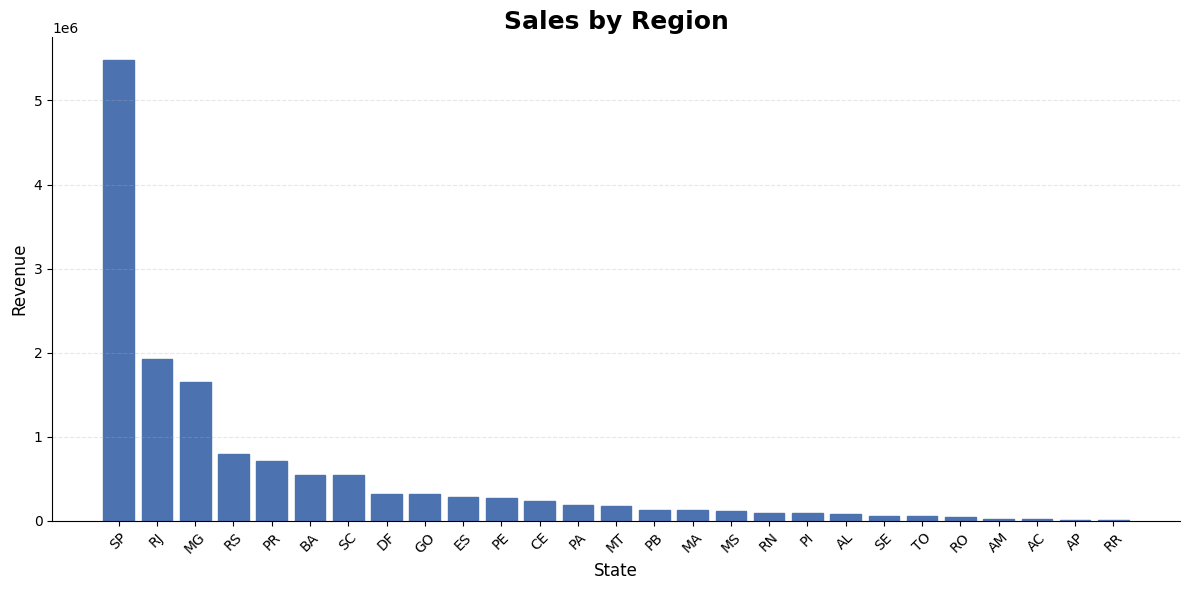

In [17]:
# Sales by Region


plt.style.use('default')

region_sales = merged_df.groupby('customer_state')['price'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))

bars = plt.bar(region_sales.index, region_sales.values)

# Soft color for all bars
for bar in bars:
    bar.set_color('#4C72B0')

plt.title("Sales by Region", fontsize=18, weight='bold')
plt.xlabel("State", fontsize=12)
plt.ylabel("Revenue", fontsize=12)

plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

Thus, the Sales by region explains Revenue on every state respectively

C:\Users\User\AppData\Local\Temp\ipykernel_15076\3293572697.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


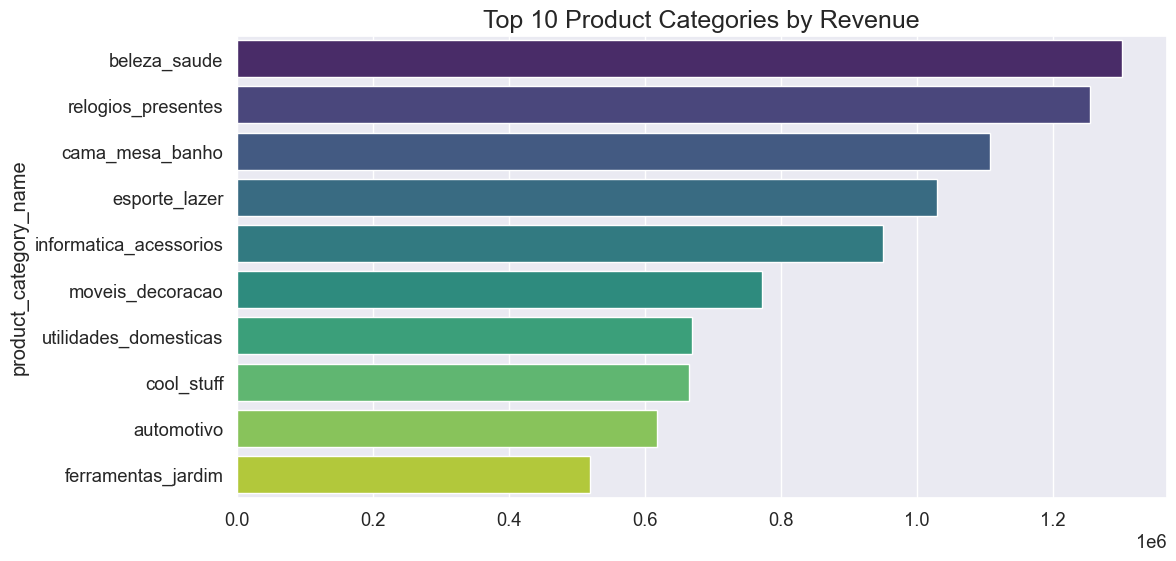

In [18]:
# Top Product Categories

plt.style.use('default')
sns.set(font_scale=1.2)

top_categories = merged_df.groupby('product_category_name')['price'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")
plt.title("Top 10 Product Categories by Revenue", fontsize=18)
plt.show()

Thus , the Top 10 Procduct categories by revenue explains as clear


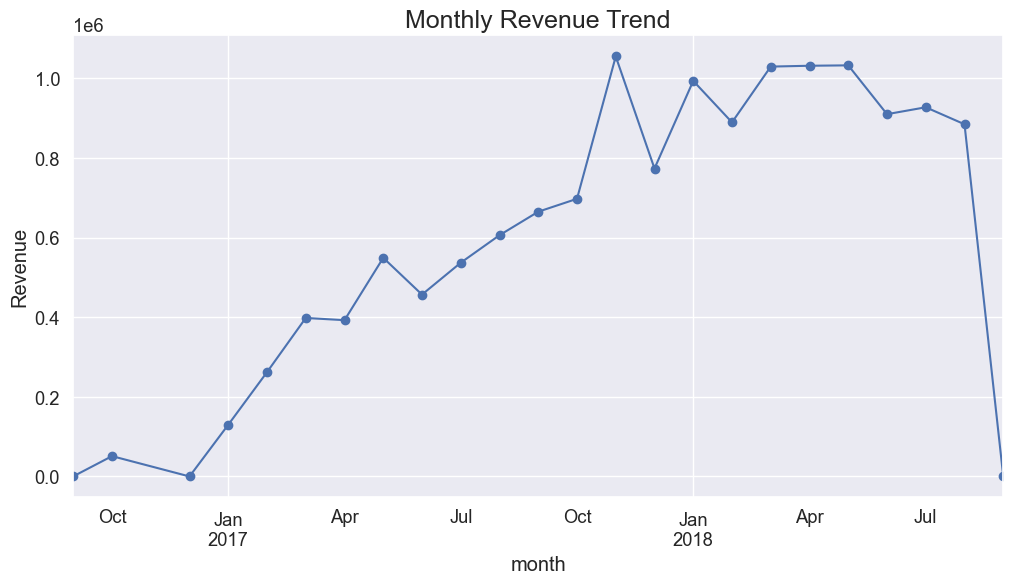

In [19]:
# Monthly Revenue Trend

merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])
merged_df['month'] = merged_df['order_purchase_timestamp'].dt.to_period('M')

monthly_sales = merged_df.groupby('month')['price'].sum()

monthly_sales.plot(figsize=(12,6), marker='o')
plt.title("Monthly Revenue Trend", fontsize=18)
plt.ylabel("Revenue")
plt.show()

The Monthly revenue trend shows the graph movements along revenue per month

## 6. Business Insights & Recommendations

1. Revenue is heavily concentrated in a few states, indicating regional dominance.
2. Certain product categories drive the majority of revenue.
3. Revenue shows seasonal spikes during specific months.
4. Credit card is the dominant payment method.
5. Customer reviews indicate areas where logistics performance needs improvement.

### Strategic Recommendations:
- Expand marketing in underperforming states.
- Focus inventory on top-selling categories.
- Launch campaigns before peak seasonal months.
- Improve delivery timelines to increase customer satisfaction.

# Executive Summary

## Overview

This report presents a comprehensive end-to-end analysis of the Brazilian E-Commerce Public Dataset (Olist). The objective of this project was to evaluate business performance, identify revenue drivers, analyze customer behavior, and generate actionable insights to support strategic decision-making.

The analysis involved data cleaning, merging multiple relational datasets, exploratory data analysis (EDA), trend evaluation, and visualization of key performance metrics.

---

## Key Business Findings

### 1. Revenue Performance
The company generated a total revenue exceeding $14 million during the observed period. Revenue growth showed consistent expansion across several months, indicating strong market demand and effective sales execution.

Seasonal fluctuations were observed, suggesting demand cycles and potential promotional or holiday impacts on purchasing behavior.

---

### 2. Regional Sales Distribution
Revenue is heavily concentrated in a few key states, particularly major metropolitan regions. This indicates strong regional dominance but also highlights untapped potential in lower-performing states.

Strategic expansion into underperforming regions could significantly increase overall revenue.

---

### 3. Product Category Insights
A limited number of product categories contribute to a significant portion of total revenue. This reflects a classic Pareto (80/20) pattern where high-performing categories drive the majority of financial results.

Optimizing inventory, marketing, and supply chain operations around these top categories can further enhance profitability.

---

### 4. Order Volume & Customer Behavior
Order volume trends closely mirror revenue growth, indicating stable pricing and consistent customer purchasing patterns. Average Order Value (AOV) remained relatively steady over time, suggesting price stability and balanced consumer spending behavior.

This stability is a positive indicator of sustainable business performance.

---

### 5. Payment & Customer Experience
Digital payments, particularly credit-based transactions, dominate the purchasing process. This confirms strong adoption of online payment systems.

Delivery performance and review data suggest that logistics efficiency plays a crucial role in customer satisfaction. Faster delivery correlates with improved review scores.

---

## Strategic Recommendations

Based on the analysis, the following business actions are recommended:

• Expand marketing investments in emerging regions  
• Focus operational efficiency on top-performing product categories  
• Launch campaigns before historically strong seasonal months  
• Improve logistics performance to increase customer satisfaction  
• Develop retention strategies to sustain recurring purchases  

---

## Business Impact

This analysis demonstrates how data-driven insights can:

- Improve revenue forecasting
- Optimize inventory planning
- Strengthen regional strategy
- Enhance customer satisfaction
- Support executive decision-making

The project reflects a structured analytics workflow aligned with industry standards, combining technical execution with business storytelling.

# Conclusion

This project successfully delivered a comprehensive business analysis of the Brazilian E-commerce dataset using a structured data analytics approach.

Through systematic data cleaning, relational dataset merging